In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/bank.csv', delimiter=';')

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
#Extracting features
feature_names = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome',]
X = df[feature_names]
y = df['y']
#
X = pd.get_dummies(X, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

In [ ]:
#splitting data (70% for training and 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#initiating descion tree and training the descison tree classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#predicting
y_pred = classifier.predict(X_test)

In [ ]:
#predicted outcome
display(y_pred)

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no',

In [ ]:
# evaluating accuracy of model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8917127071823204


In [ ]:
print("Classification report")
print(classification_report(y_test, y_pred))

Classification report
              precision    recall  f1-score   support

          no       0.94      0.93      0.94       807
         yes       0.50      0.54      0.52        98

    accuracy                           0.89       905
   macro avg       0.72      0.74      0.73       905
weighted avg       0.90      0.89      0.89       905



In [ ]:
#Displaying the stucture of trained decision tree
print("Decision tree Structure", export_text(classifier, feature_names= list(X.columns)))

Decision tree Structure |--- duration <= 645.50
|   |--- poutcome_success <= 0.50
|   |   |--- duration <= 222.50
|   |   |   |--- month_oct <= 0.50
|   |   |   |   |--- month_mar <= 0.50
|   |   |   |   |   |--- age <= 20.00
|   |   |   |   |   |   |--- education_unknown <= 0.50
|   |   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |   |--- education_unknown >  0.50
|   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |--- age >  20.00
|   |   |   |   |   |   |--- month_apr <= 0.50
|   |   |   |   |   |   |   |--- month_feb <= 0.50
|   |   |   |   |   |   |   |   |--- poutcome_other <= 0.50
|   |   |   |   |   |   |   |   |   |--- pdays <= 455.50
|   |   |   |   |   |   |   |   |   |   |--- age <= 34.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |   |--- age >  34.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |--- pdays >  455.

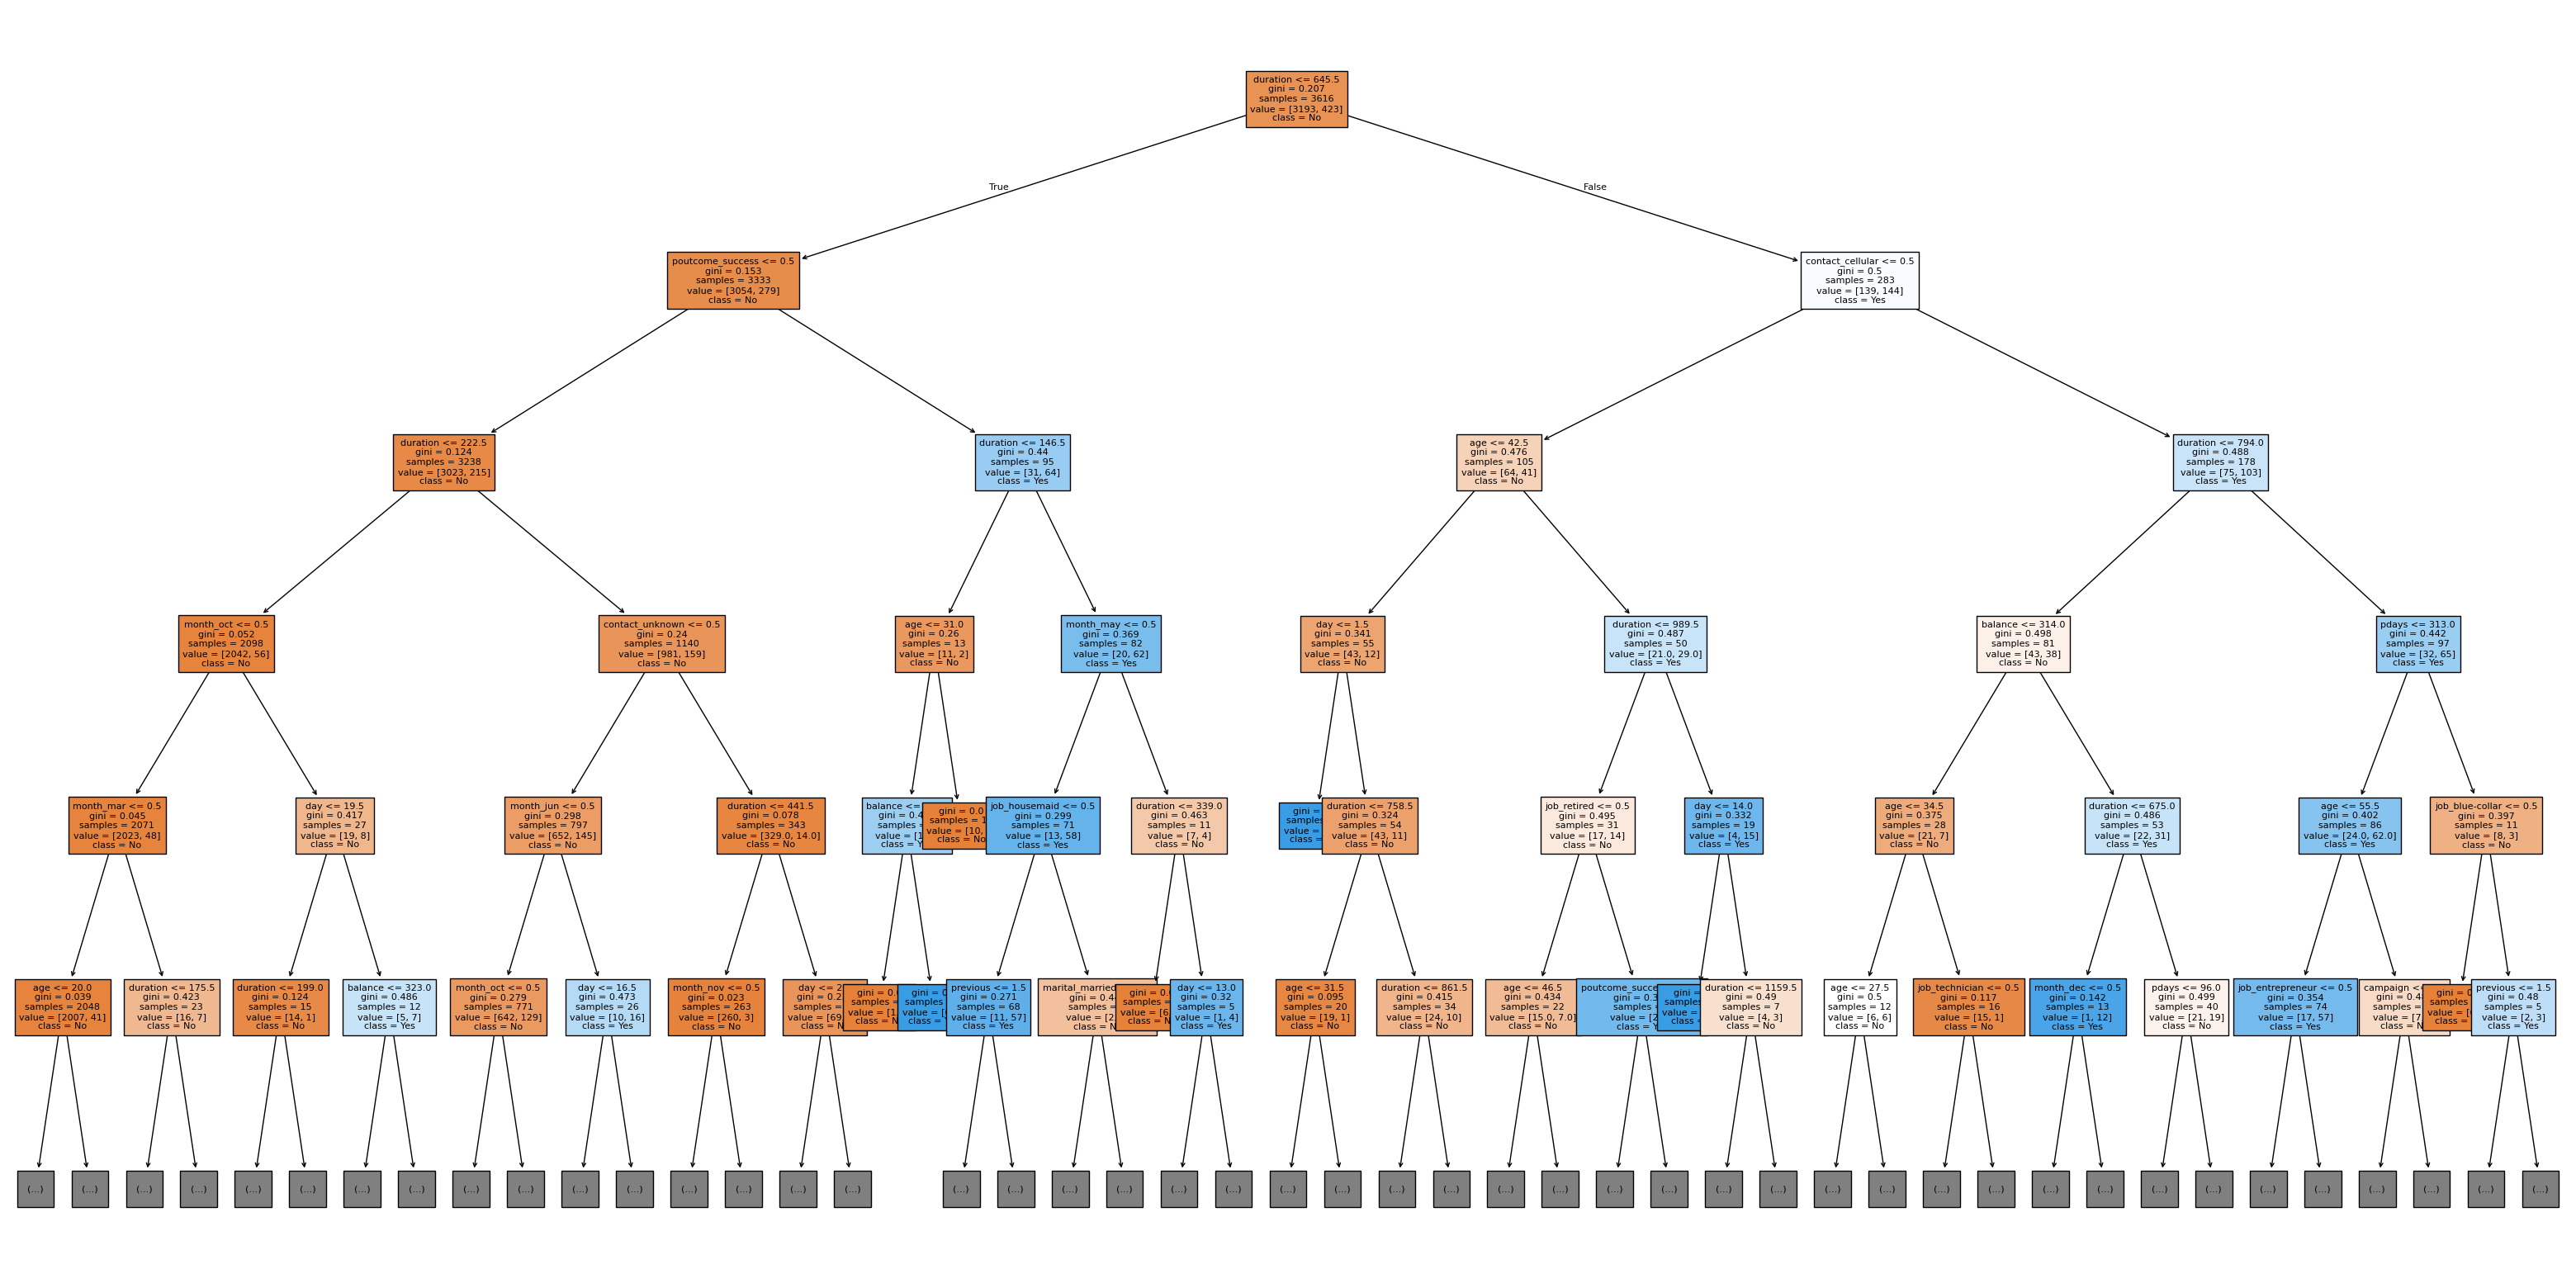

In [ ]:
#Plot descison tree
plt.figure(figsize=(40,20))
plot_tree(classifier, filled=True, feature_names=list(X.columns), class_names=['No', 'Yes'], fontsize=8, max_depth=5)
plt.show()

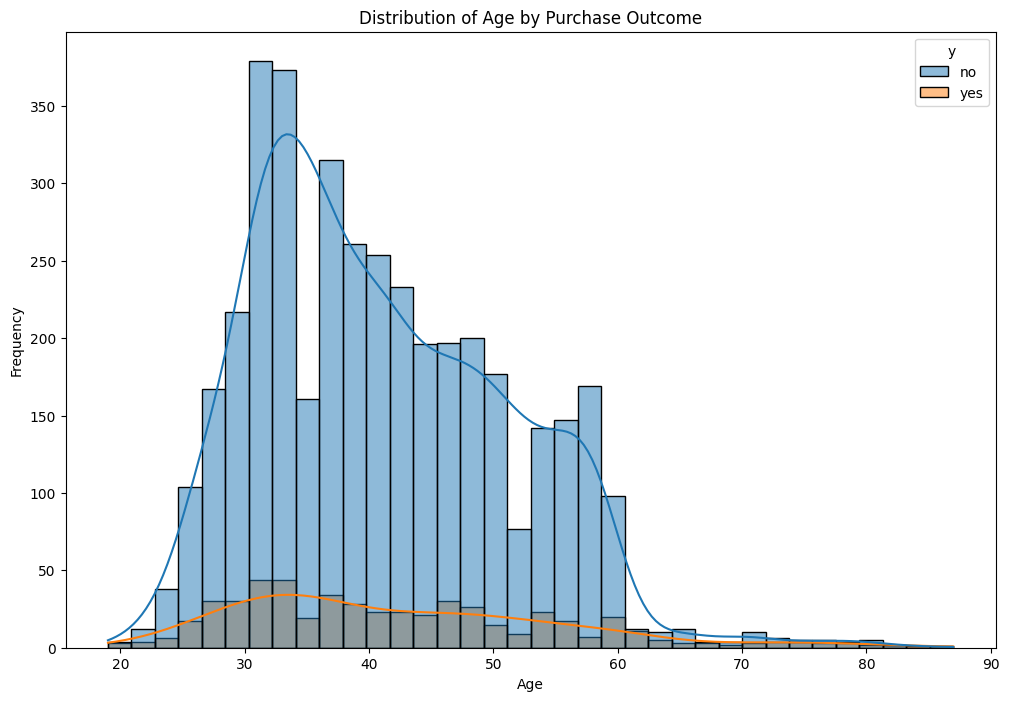

In [ ]:
# Histogram visualizing the outcome(y) based on the age
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='age', hue='y', kde=True)
plt.title('Distribution of Age by Purchase Outcome')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

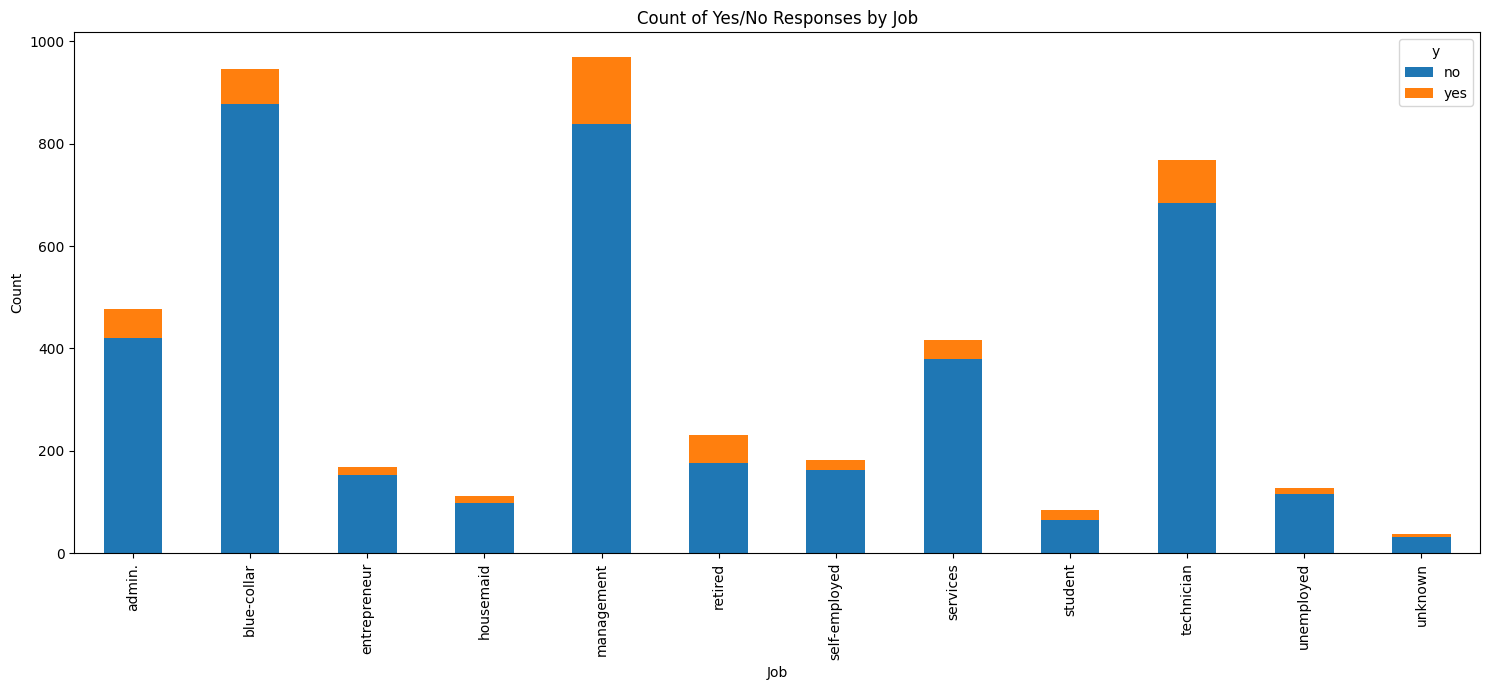

In [ ]:
#Count plot visualizing the outcome(y) based on job
job_y_counts = df.groupby('job')['y'].value_counts().unstack().fillna(0)

job_y_counts.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Count of Yes/No Responses by Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='y')
plt.tight_layout()
plt.show()